In [1]:
# Imports
import numpy as np
import cv2
import os
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d,art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib notebook

In [2]:
#Loading the image and object points for PnP
pnparg = np.load("data/pnparg.npz")
plotarg=np.load("data/plotarg.npz")
cameraMatrix=pnparg['cameraMatrix']
imagePoints_0=pnparg['imagePoints_0']
imagePoints_1=pnparg['imagePoints_1']
imagePoints_2=pnparg['imagePoints_2']
imagePoints_3=pnparg['imagePoints_3']
imagePoints_4=pnparg['imagePoints_4']
imagePoints_5=pnparg['imagePoints_5']
imagePoints_6=pnparg['imagePoints_6']
imagePoints_7=pnparg['imagePoints_7']
image_plane_center=pnparg['image_plane_center_zero']
objectPoints_0=pnparg['objectPoints_0']
objectPoints_1=pnparg['objectPoints_1']
objectPoints_2=pnparg['objectPoints_2']
objectPoints_3=pnparg['objectPoints_3']
objectPoints_4=pnparg['objectPoints_4']
objectPoints_5=pnparg['objectPoints_5']
objectPoints_6=pnparg['objectPoints_6']
objectPoints_7=pnparg['objectPoints_7']
poly3d=plotarg['poly3d']
vertices=plotarg['vertices']
world_plane_center=plotarg['world_plane_center']

if not os.path.exists('sol_1a'):
    os.makedirs('sol_1a')

In [3]:
#Run PnP to return the rotation and translation vector
#Returns the Translation and Rotation vector
def PnPSolver(objectPoints, imagePoints, cameraMatrix):
    retval, rvec, tvec = cv2.solvePnP(
        objectPoints=objectPoints, imagePoints=imagePoints, cameraMatrix=cameraMatrix, distCoeffs=0)
    rvec = rvec.reshape(3, 1)
    tvec = tvec.reshape(3, 1)
    rvec_matrix = cv2.Rodrigues(src=rvec)
    rvec_matrix = np.array(rvec_matrix[0])
    return rvec_matrix, tvec


In [4]:
#Plot the Quiver from the camera center in the direction towards image center
def point_plotter_center_plane(plane_center,rvec, tvec, plt):
    start_point=-np.matmul(np.linalg.inv(np.matmul(cameraMatrix,rvec)),np.matmul(cameraMatrix,tvec))
    dir_vector=start_point.reshape(3,1)-plane_center.reshape(3,1)
    dir_vector=dir_vector/np.sqrt(np.sum(np.square(dir_vector)))
    dir_vector=-dir_vector
    ax.quiver(start_point[0],start_point[1], start_point[2], dir_vector[0], dir_vector[1], dir_vector[2], length=0.25)
    return fig, plt


In [5]:
#Run PnP for all the 8 images of task1
rvec_0, tvec_0=PnPSolver(objectPoints_0, imagePoints_0, cameraMatrix)
rvec_1, tvec_1=PnPSolver(objectPoints_1, imagePoints_1, cameraMatrix)
rvec_2, tvec_2=PnPSolver(objectPoints_2, imagePoints_2, cameraMatrix)
rvec_3, tvec_3=PnPSolver(objectPoints_3, imagePoints_3, cameraMatrix)
rvec_4, tvec_4=PnPSolver(objectPoints_4, imagePoints_4, cameraMatrix)
rvec_5, tvec_5=PnPSolver(objectPoints_5, imagePoints_5, cameraMatrix)
rvec_6, tvec_6=PnPSolver(objectPoints_6, imagePoints_6, cameraMatrix)
rvec_7, tvec_7=PnPSolver(objectPoints_7, imagePoints_7, cameraMatrix)


<IPython.core.display.Javascript object>


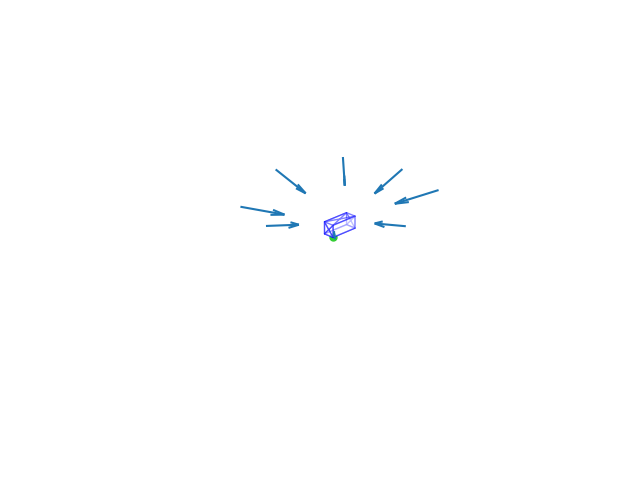

In [6]:
#Plot the results of PnP
fig = plt.figure()
plt.ion()
plt.draw()
ax = plt.axes(projection="3d")
world_origin = np.array((0, 0, 0)).reshape(3, 1).astype(np.int)
ax.set_xlim(-0.6,0.6)
ax.set_ylim(-0.6,0.6)
ax.set_zlim(-0.6,0.6)
plt.axis('off')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter3D(0,0,0,c="limegreen",marker="o",s=25)


ax.add_collection3d(Poly3DCollection(poly3d,facecolors='w',linewidths=1,alpha=0.5,edgecolor='b'))

fig, plt = point_plotter_center_plane(world_plane_center[0],rvec_0, tvec_0, plt)
fig, plt = point_plotter_center_plane(world_plane_center[1],rvec_1, tvec_1, plt)
fig, plt = point_plotter_center_plane(world_plane_center[2],rvec_2, tvec_2, plt)
fig, plt = point_plotter_center_plane(world_plane_center[3],rvec_3, tvec_3, plt)
fig, plt = point_plotter_center_plane(world_plane_center[4],rvec_4, tvec_4, plt)
fig, plt = point_plotter_center_plane(world_plane_center[5],rvec_5, tvec_5, plt)
fig, plt = point_plotter_center_plane(world_plane_center[6],rvec_6, tvec_6, plt)
fig, plt = point_plotter_center_plane(world_plane_center[7],rvec_7, tvec_7, plt)

for ang in range(0,360,45):
        ax.view_init(elev=25, azim=270+ang)
        ax.dist=10
        image_name="sol_1a/view"+str(ang)+".png"
        plt.savefig(image_name,bbox_inches = 'tight',pad_inches = 0)   

In [7]:
#Find the values of camera center
camera_center_0=-np.matmul(np.linalg.inv(np.matmul(cameraMatrix,rvec_0)),np.matmul(cameraMatrix,tvec_0))
camera_center_1=-np.matmul(np.linalg.inv(np.matmul(cameraMatrix,rvec_1)),np.matmul(cameraMatrix,tvec_1))
camera_center_2=-np.matmul(np.linalg.inv(np.matmul(cameraMatrix,rvec_2)),np.matmul(cameraMatrix,tvec_2))
camera_center_3=-np.matmul(np.linalg.inv(np.matmul(cameraMatrix,rvec_3)),np.matmul(cameraMatrix,tvec_3))
camera_center_4=-np.matmul(np.linalg.inv(np.matmul(cameraMatrix,rvec_4)),np.matmul(cameraMatrix,tvec_4))
camera_center_5=-np.matmul(np.linalg.inv(np.matmul(cameraMatrix,rvec_5)),np.matmul(cameraMatrix,tvec_5))
camera_center_6=-np.matmul(np.linalg.inv(np.matmul(cameraMatrix,rvec_6)),np.matmul(cameraMatrix,tvec_6))
camera_center_7=-np.matmul(np.linalg.inv(np.matmul(cameraMatrix,rvec_7)),np.matmul(cameraMatrix,tvec_7))


In [8]:
#Store the values of camera center, rotation matrix and the translation vector for succeeding tasks

camera_center=np.zeros((8,3))
camera_center[0,:]=np.ravel(camera_center_0)
camera_center[1,:]=np.ravel(camera_center_1)
camera_center[2,:]=np.ravel(camera_center_2)
camera_center[3,:]=np.ravel(camera_center_3)
camera_center[4,:]=np.ravel(camera_center_4)
camera_center[5,:]=np.ravel(camera_center_5)
camera_center[6,:]=np.ravel(camera_center_6)
camera_center[7,:]=np.ravel(camera_center_7)
rvec=np.zeros((8,9))
rvec[0,:]=np.ravel(rvec_0)
rvec[1,:]=np.ravel(rvec_1)
rvec[2,:]=np.ravel(rvec_2)
rvec[3,:]=np.ravel(rvec_3)
rvec[4,:]=np.ravel(rvec_4)
rvec[5,:]=np.ravel(rvec_5)
rvec[6,:]=np.ravel(rvec_6)
rvec[7,:]=np.ravel(rvec_7)
tvec=np.zeros((8,3))
tvec[0,:]=np.ravel(tvec_0)
tvec[1,:]=np.ravel(tvec_1)
tvec[2,:]=np.ravel(tvec_2)
tvec[3,:]=np.ravel(tvec_3)
tvec[4,:]=np.ravel(tvec_4)
tvec[5,:]=np.ravel(tvec_5)
tvec[6,:]=np.ravel(tvec_6)
tvec[7,:]=np.ravel(tvec_7)

np.savez('data/sol_1a.npz',
         rvec=rvec, tvec=tvec,camera_center=camera_center,
         )